Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης

Τμήμα Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών



<center><h3>Εργασία Μαθήματος Αριθμητικής Ανάλυσης</h3>

<h4>Γαλάνη Δήμητρα</h4>


## Επέκταση της μεθόδου Newton για την επίλυση εξισώσεων μιας μεταβλητής ##

Στην εργασία αυτήν θα υλοποιηθεί μια διαφορετική μέθοδος αναζήτησης ρίζας, η οποία μοιάζει με την μέθοδο Newton. Η σειρά Taylor, σε αυτή την μέθοδο, αντί για $N = 1$ έχει $N = 2$. Οπότε στον τύπο θα περιέχεται τόσο η πρώτη παράγωγος όσο και η δεύτερη παράγωγος της συνάρτησης.

Από την σειρά Taylor για N = 2: $f(x) = f(x_0) + f^\prime(x_0)\cdot (x-x_0) + \dfrac{f^{\prime\prime}(x_0)}{2!} \cdot (x-x_0)^2$. Εφόσον πρέπει να βρεθεί η ρίζα της εξίσωσης τίθεται το $f(x) = 0$ και επίσης $2! = 2\cdot 1 = 2$. Οπότε τελικά

 $f(x_0) + f^\prime(x_0)\cdot (x-x_0) + \dfrac{f^{\prime\prime}(x_0)}{2} \cdot (x-x_0)^2 = 0$.

 Στον κώδικα ορίζονται δύο συναρτήσεις οι οποίες υπολογίζουν την πρώτη και την δεύτερη παράγωγο μιας συνάρτησης σε συγκεκριμένο σημείο x. Οι συναρτήσεις αυτές θα χρησιμοποιηθούν στην πορεία καθώς όπως φαίνεται από τον παραπάνω τύπο για τον υπολογισμό της ρίζας θα πρέπει να υπολογιστεί η πρώτη και η δεύτερη παράγωγος σε συγκεκριμένο σημείο για κάθε επανάληψη. Οι συναρτήσεις αυτές είναι βοηθητικές και έχουν σαν ορίσματα: την συνάρτηση function της οποίας η παράγωγος θα υπολογιστεί και το σημείο x στο οποίο θα υπολογιστεί η τιμή της αυτή. Οι παράγωγοι υπολογίζονται με βάση τον ορισμό τους.

In [24]:
import numpy as np

def numerical_derivative(function, x):
    h = 1e-5 # h is a small number close to zero
    return (function(x + h) - function(x - h)) / (2 * h)

def numerical_second_derivative(function, x):
    h = 1e-5 # h is a small number close to zero
    return (function(x + h) - 2 * function(x) + function(x - h)) / (h * h)

**Α:** Αρχικά πρέπει να λυθεί η εξίσωση ως προς $x$. Η δευτεροβάθμια εξίσωση έχει άγνωστο το $(x-x_0)$, οπότε ορίζεται μια νέα μεταβλητή για ευκολία $z = x-x_0$ και θα λυθεί την νέα εξίσωση που προκύπτει. Η εξίσωση μετασχηματίζεται στην:

$f(x_0) + f^\prime(x_0)\cdot z + \dfrac{f^{\prime\prime}(x_0)}{2} \cdot z^2 = 0$

Για να λυθεί η εξίσωση υπολογίζεται πρώτα η διακρίνουσα και τελικά η λύση της θα είναι η εξής: $z = \dfrac{-b\pm \sqrt{b^2-4\cdot a\cdot c}}{2\cdot a} = \dfrac{-f^\prime(x_0)\pm \sqrt{(f^\prime(x_0))^2-4\cdot \dfrac{f^{\prime\prime}(x_0)}{2}\cdot f(x_0)}}{2\cdot \dfrac{f^{\prime\prime}(x_0)}{2}} = \dfrac{-f^\prime(x_0)\pm \sqrt{(f^\prime(x_0))^2-2\cdot f^{\prime\prime}(x_0)\cdot f(x_0)}}{f^{\prime\prime}(x_0)} $. Τέλος η μεταβλητή επαναφέρεται στην αρχική της μορφή δηλαδή $x = x_0 + z$ και σε αναλυτική μορφή:

$x = x_0 + \dfrac{-f^\prime(x_0)\pm \sqrt{(f^\prime(x_0))^2-2\cdot f^{\prime\prime}(x_0)\cdot f(x_0)}}{f^{\prime\prime}(x_0)}$

Οι λύσεις της εξίσωσης είναι δύο. Στην υλοποίηση παρακάτω βρίσκονται και οι δύο νέες λύσεις x_new1 και x_new2 και επιλέγεται αυτή που βρίσκεται πιο κοντά στο x. Στην μέθοδο επέκτασης ακολουθείται η λογική της μεθόδου του Newton. Πιο συγκεκριμένα, αρχικά υπολογίζονται οι παράγωγοι, οι οποίες εμφανίζονται στην σειρά Taylor, και στην συνέχεια ελέγχεται εάν το νέο σημείο που βρέθηκε ικανοποιεί το κριτήριο σύγκλισης. Εάν ναι, επιστρέφεται η τιμή του σημείου και ο πίνακας των απόλυτων σφαλμάτων. Εάν όχι το x_new παίρνει την θέση του x και πραγματοποιείται η επόμενη επανάληψη μέχρι να πραγματοποιηθεί σύγκλιση ή μέχρι να πραγματοποιηθούν οι μέγιστες επαναλήψεις που έχουν οριστεί. Στον παρακάτω κώδικα υπάρχουν σχόλια που εξηγούν τι γίνεται κάθε στιγμή.

In [25]:
# Expation of Newton's method using second-order Taylor
def newton_second_order(f, x0, tol, max_iter):
    # Initialization
    x = x0
    absolut_errors = []
    for i in range(max_iter):
        # Calculate value of the function and derivatives at the current point
        f_x = f(x)
        f_prime_x = numerical_derivative(f, x)
        f_double_prime_x = numerical_second_derivative(f, x)
        
        # Check if the second derivative is zero - If it is, there is the first case where the method fails
        if f_double_prime_x == 0:
            print("Second derivative is zero. Method fails.")
            return x, absolut_errors

        # Calculate the discriminant
        disc = f_prime_x**2 - 2 * f_x * f_double_prime_x
        
        # Check if the discriminant is negative - If it is, there is the second case where the method fails
        if disc < 0:
            print("Discriminant is negative. Method fails.")
            return x, absolut_errors
        
        # Calculate both solutions for z
        z1 = (-f_prime_x + np.sqrt(disc)) / f_double_prime_x
        z2 = (-f_prime_x - np.sqrt(disc)) / f_double_prime_x
        
        # Calculate new points
        x_new1 = x + z1
        x_new2 = x + z2
        
        # Choose the solution closer to the current point
        if abs(x_new1 - x) < abs(x_new2 - x):
            x_new = x_new1
        else:
            x_new = x_new2
        
        # Enter the absolute error in the list
        absolut_errors.append(abs(x_new - x))

        # Check if the method has converged
        if abs(x_new - x) < tol:
            return x_new, absolut_errors
        
        # Update the current point
        x = x_new
    
    print("Maximum iterations reached. Method may not have converged.")
    return x, absolut_errors

**Β:** Στο παρακάτω χωρίο κώδικα ορίζονται οι συναρτήσεις που θα μελετηθούν και ελέγχεται η σύγκλιση τους. Για τις συναρτήσεις αυτές είναι γνωστό εκ των προτέρων ότι συγκλίνουν. Για διευκόλυνση οπτικοποιούνται οι συναρτήσεις σε ένα καρτεσιανό επίπεδο συντεταγμένων με την βοήθεια της βιβλιοθήκη matplotlib. Στα τρία διαγράμματα φαίνονται οι ρίζες της συνάρτησης στο διάστημα που σχεδιάζονται. Οι ρίζες αυτές έχουν υπολογιστεί χρησιμοποιώντας την συνάρτηση root_scalar από την βιβλιοθήκη scipy.optimize, οπότε θεωρείται ότι οι ρίζες αυτές έχουν υπολογιστεί με μεγάλη ακρίβεια. 

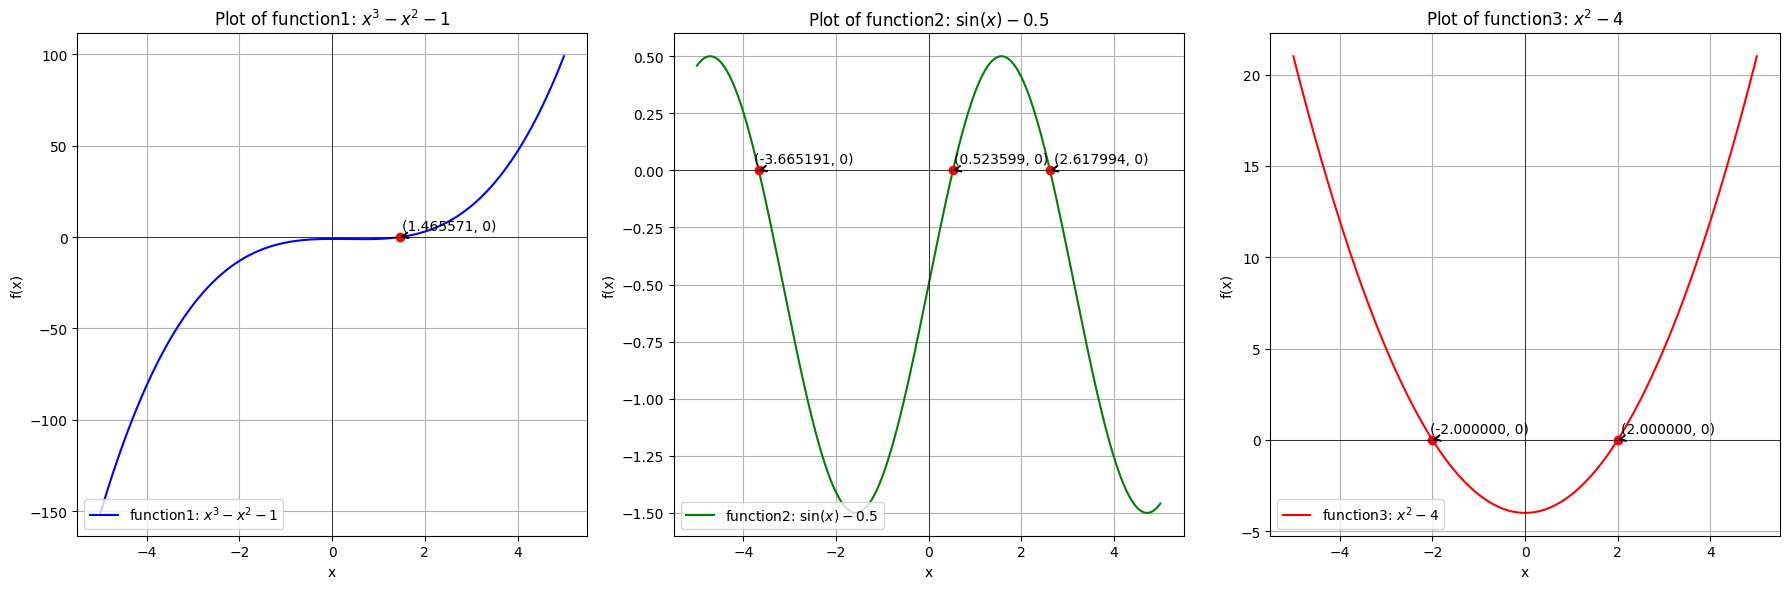

In [26]:
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
def function1(x):
    return x**3 - x**2 - 1

def function2(x):
    return np.sin(x) - 0.5

def function3(x):
    return x**2 - 4

# Define the functions array with the functions, their intervals, labels, and colors
functions = [
    (function1, (-5, 5), 'function1: $x^3 - x^2 - 1$', 'blue'),
    (function2, (-5, 5), 'function2: $\sin(x) - 0.5$', 'green'),
    (function3, (-5, 5), 'function3: $x^2 - 4$', 'red')
]

# Define the range for x values
x_values = np.linspace(-5, 5, 400)

# Function to find all roots in the interval using root_scalar
def find_roots(f, interval):
    step=0.1
    roots = []
    x_min, x_max = interval
    x = x_min
    while x < x_max:
        try:
            root = root_scalar(f, bracket=[x, x + step], method='brentq').root
            if not any(np.isclose(root, existing_root, atol=1e-5) for existing_root in roots):
                roots.append(root)
        except ValueError:
            pass
        x += step
    return roots

# In order to plot the functions next to each other: Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (func, interval, label, color) in enumerate(functions):
    # Calculate y values for the function
    y_values = func(x_values)

    # Find the roots of the function within the given interval
    roots_c = find_roots(func, interval)

    # Plot the function
    axs[i].plot(x_values, y_values, label=label, color=color)
    
    # Plot the roots
    for root in roots_c:
        axs[i].plot(root, func(root), 'ro')
        axs[i].annotate(f'({root:.6f}, 0)', xy=(root, func(root)), xytext=(root, func(root) + 5),
                        textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5))

    # Set titles, labels, and grid
    axs[i].set_title(f'Plot of {label}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].axhline(0, color='black', linewidth=0.5)
    axs[i].axvline(0, color='black', linewidth=0.5)
    axs[i].grid(True)
    axs[i].legend(loc='lower left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Στην συνέχεια χρησιμοποιείται η συνάρτηση newton_second_order που υλοποιήθηκε παραπάνω για να δειχτεί ότι πράγματι λειτουργεί με τις συγκεκριμένες συναρτήσεις, τις οποίες οπτικοποιήσαμε. Θεωρείται ότι οι συναρτήσεις θα συγκλίνουν και η συνάρτηση δεν θα τερματίσει με κάποιο υπολογιστικό σφάλμα. Εάν η συνάρτηση που εξετάζεται έχει παραπάνω από μία ρίζες, η συνάρτηση newton_second_order επιστρέφει μία ρίζα της εξίσωσης, αυτήν που βρίσκεται πιο κοντά στην αρχική πρόβλεψη.

In [27]:
# Define the initial guesses, functions, tolerance, and maximum number of iterations
initial_guesses = [1.2, 1.6, 1.5]
functions = [function1, function2, function3]
tolerance = 1e-6
max_iterations = 100

# Initialize list to store errors - useful for C part
all_errors = []

# Calls the Newton's extended method for each function - it also collects the errors for C part
for i in range(len(functions)):
    root, errors = newton_second_order(functions[i], initial_guesses[i], tolerance, max_iterations)
    all_errors.append(errors)
    print(f"{functions[i].__name__} converged to root {root} with {len(errors)} iterations.")


function1 converged to root 1.4655712318767682 with 3 iterations.
function2 converged to root 2.6179938779914944 with 4 iterations.
function3 converged to root 1.9999999999999998 with 2 iterations.


**Γ:** Για την δημιουργία διαγράμματος λογαριθμικής κλίμακας χρησιμοποιούνται οι τιμές των απόλυτων σφαλμάτων που συλλέχθηκαν στο παραπάνω χωρίο κώδικα με την κλήση της συνάρτησης. Για την δημιουργία του διαγράμματος αρχικά λογαριθμίζονται οι τιμές των απόλυτων σφαλμάτων και το πλήθος των επαναλήψεων. Στην συνέχεια σχεδιάζεται η γραφική με:
- x άξονα: λογαριθμική τιμή των επαναλήψεων.
- y άξονα: λογαριθμική τιμή του απόλυτου σφάλματος.

Κάθε γραμμή αντιστοιχεί σε ένα παράδειγμα προβλήματος επίλυσης εξίσωσης.

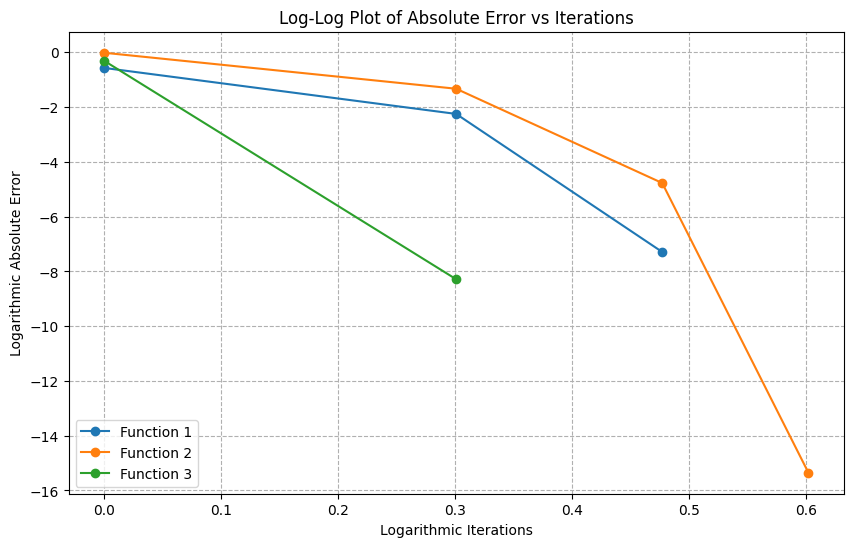

In [28]:
# Plot the log-log plot for each function's errors
plt.figure(figsize=(10, 6))

for i, errors in enumerate(all_errors):
    iterations = np.arange(1, len(errors) + 1) # Create an array with the number of iterations from 1 to the number of errors
    log_iterations = np.log10(iterations)
    log_errors = np.log10(errors)
    plt.plot(log_iterations, log_errors, marker='o', label=f'Function {i+1}')

plt.xlabel('Logarithmic Iterations')
plt.ylabel('Logarithmic Absolute Error')
plt.title('Log-Log Plot of Absolute Error vs Iterations')
plt.legend(loc='lower left')
plt.grid(True, linestyle='--')
plt.show()

**Δ:** Στο παρακάτω χωρίο έχει υλοποιηθεί μια συνάρτηση που εφαρμόζει την μέθοδο Newton, προκειμένου να μπορούν να εξαχθούν κάποια συμπεράσματα. Όπως παρατηρείται από τα διαγράμματα και τα μηνύματα που έχουν εκτυπωθεί η επέκταση της μεθόδου Newton φαίνεται αρκετά ακριβής, καθώς προσεγγίζει την ρίζα με μεγάλη ακρίβεια. Επίσης, οι επαναλήψεις που πραγματοποιεί προκειμένου να φτάσει στην ρίζα είναι αρκετά λιγότερες σε σχέση με τις επαναλήψεις που πραγματοποιεί η μέθοδος Newton το οποίο σημαίνει ότι φτάνει στο σημείο σύγκλισης αρκετά γρήγορα. Το κύριο αρνητικό αυτής της μεθόδου επέκτασης είναι ότι μπορεί να λειτουργήσει για πολύ συγκεκριμένες συναρτήσεις, καθώς για την συνάρτηση που μελετάται, πρέπει σε κάθε σημείο που εξετάζεται να:
* είναι η δεύτερη παράγωγος μη μηδενική γιατί τότε θα προκύψει διαίρεση με το μηδέν και η μέθοδος θα τερματίσει με υπολογιστικό σφάλμα.
* είναι η διακρίνουσα το πολυωνύμου που προκύπτει μη αρνητική, καθώς δουλεύουμε με πραγματικούς αριθμούς.

Το οποίο είναι πολύ περιοριστικό, ενώ στην μέθοδο Newton το μόνο που πρέπει να προσεχτεί είναι ότι η πρώτη παράγωγος πρέπει να είναι μη μηδενική γιατί τότε θα προκύψει διαίρεση με το μηδέν.


In [29]:
# Newton's method
def newton_method(f, x0, tol, max_iter):
    x = x0
    absolute_errors = []
    for _ in range(max_iter):
        f_x = f(x)
        f_prime_x = numerical_derivative(f, x)
        
        if f_prime_x == 0:
            print("Derivative is zero. Method fails.")
            return x, absolute_errors

        x_new = x - f_x / f_prime_x
        absolute_errors.append(abs(x_new - x))

        if abs(x_new - x) < tol:
            return x_new, absolute_errors
        x = x_new
    print("Maximum iterations reached. Method may not have converged.")
    return x, absolute_errors

all_errors2 = []

for i in range(len(functions)):
    root, errors2 = newton_method(functions[i], initial_guesses[i], tolerance, max_iterations)
    all_errors2.append(errors2)
    print(f"{functions[i].__name__} converged to root {root} with {len(errors2)} iterations.")

function1 converged to root 1.4655712318767682 with 5 iterations.
function2 converged to root 19.373154697137057 with 5 iterations.
function3 converged to root 2.0000000000001203 with 4 iterations.


## Runge-Kutta - Ελένη και Πάρης ##

Σε αυτό το πρόβλημα ένα σύστημα μοντελοποιεί τα συναισθήματα δύο ατόμων, της Ελένης και του Πάρη, που βρίσκονται σε μια σχέση. 

$
\begin{cases}
    \begin{aligned}
        \frac{dx}{dt} &= -\alpha y\\
        \frac{dy}{dt} &= -\beta x - \gamma y^2
    \end{aligned}
\end{cases}
$

- $x(t)$: το συναίσθημα του Πάρη για την Ελένη την χρονική στιγμή t.
- $y(t)$: το συναίσθημα της Ελένης για τον Πάρη την χρονική στιγμή t.

Τα συναισθήματα παίρνουν τιμές στο διάστημα $[-5, 5]$. Οπότε $x(t) \in [-5, 5]$ και $y(t) \in [-5, 5]$.

**Α:** Το σύστημα έχει τιμές παραμέτρων:
- $α=0.2$
- $β=0.8$
- $γ=0.1$

και αρχικές συνθήκες $x(0)=2$ και $y(0)=0$. Το σύστημα διαφορικών εξισώσεων πρέπει να λυθεί για $t \in [0, 60]$ με την μέθοδο Runge-Kutta τέταρτης τάξης, η οποία είναι η πιο συνηθισμένη. Η πρώτη εξίσωση ορίζεται ως $f(x, y, t)$ και η δεύτερη ως $g(x, y, t)$. Προκύπτει δηλαδή το σύστημα:
$
\begin{cases}
f(x, y, t) = \frac{dx}{dt} = -ay \\
g(x, y, t) = \frac{dy}{dt} = bx - cy^2
\end{cases}
$
. Επειδή υπάρχουν δύο εξισώσεις θα προκύψουν και δύο συντελεστές k για κάθε βαθμίδα, π.χ. θα έχω $k_{1,x}$ και $k_{1,y}$. Οι τύποι για τις κλίσεις σύμφωνα με την θεωρία του μαθήματος είναι οι εξής:

- **$k_1$** κλίση:

$
\begin{aligned}
k_{1,x} &= h f(x_n, y_n, t_n) = -h a y_n \\
k_{1,y} &= h g(x_n, y_n, t_n) = h (b x_n - c y_n^2)
\end{aligned}
$

- **$k_2$** κλίση:

$
\begin{aligned}
k_{2,x} &= h f\left(x_n + \frac{k_{1,x}}{2}, y_n + \frac{k_{1,y}}{2}, t_n + \frac{h}{2}\right) = -h a \left(y_n + \frac{k_{1,y}}{2}\right)
\end{aligned}
$

$
\begin{aligned}
k_{2,y} &= h g\left(x_n + \frac{k_{1,x}}{2}, y_n + \frac{k_{1,y}}{2}, t_n + \frac{h}{2}\right) = h \left(b \left(x,n + \frac{k_{1,x}}{2}\right) - c \left(y_n + \frac{k_{1,y}}{2}\right)^2\right)
\end{aligned}
$

- **$k_3$** κλίση:

$
\begin{aligned}
k_{3,x} &= h f\left(x_n + \frac{k_{2,x}}{2}, y_n + \frac{k_{2,y}}{2}, t_n + \frac{h}{2}\right) = -h a \left(y_n + \frac{k_{2,y}}{2}\right)
\end{aligned}
$

$
\begin{aligned}
k_{3,y} &= h g\left(x_n + \frac{k_{2,x}}{2}, y_n + \frac{k_{2,y}}{2}, t_n + \frac{h}{2}\right) = h \left(b \left(x_n + \frac{k_{2,x}}{2}\right) - c \left(y_n + \frac{k_{2,y}}{2}\right)^2\right)
\end{aligned}
$

- **$k_4$** κλίση:

$
\begin{aligned}
k_{4,x} &= h f\left(x_n + k_{3,x}, y_n + k_{3,y}, t_n + h\right) = -h a \left(y_n + k_{3,y}\right)
\end{aligned}
$

$
\begin{aligned}
k_{4,y} &= h g\left(x_n + k_{3,x}, y_n + k_{3,y}, t_n + h\right) = h \left(b \left(x_n + k_{3,x}\right) - c \left(y_n + k_{3,y}\right)^2\right)
\end{aligned}
$

και οι τύποι ανανέωσης των $x_{n+1}$ και $y_{n+1}$ είναι:

$
x_{n+1} = x_n + \frac{1}{6} (k_{1,x} + 2k_{2,x} + 2k_{3,x} + k_{4,x})
$

$
y_{n+1} = y_n + \frac{1}{6} (k_{1,y} + 2k_{2,y} + 2k_{3,y} + k_{4,y})
$

Ο χρόνος ανανεώνεται με την αύξηση του κατά το βήμα h που επιλέγεται αυθαίρετα. Όσο πιο μικρό το h τόσο μεγαλύτερη ακρίβεια θα υπάρχει στο διάγραμμα γιατί θα έχουν δημιουργηθεί περισσότερα σημεία.

$
t_{n+1} = t_n + h
$

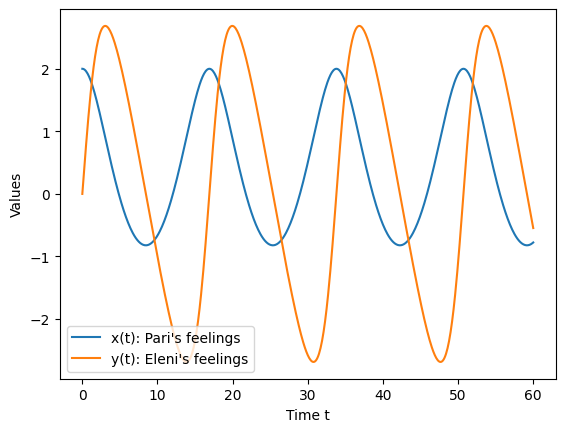

In [30]:
import matplotlib.pyplot as plt
# Parameters
a = 0.2
b = 0.8
c = 0.1
h = 0.1  # Time step
t_final = 60 # Final time


def f(x, y, a, b, c): # Although the function does not depend on x, b, c, we define them as arguments for generality
    return -a * y

def g(x, y, a, b, c):
    return b * x - c * y**2

def RungeKutta(a, b, c, h, t_final):
    
    # Create lists to store the values of x, y, and t with initial values
    x = [2]
    y = [0]
    t = [0]

    # Define the system of differential equations


    # Runge-Kutta 4th order method
    while t[-1] < t_final:
        # Get the most recent values of x, y, and t 
        x_n = x[-1] #x[-1] is the last element of the list x
        y_n = y[-1]
        t_n = t[-1]

    # Since the two differential equations dont have t in them, we dont use f(x,y,t) and g(x,y,t) but f(x,y) and g(x,y) instead
        k1_x = h * f(x_n, y_n, a, b, c) 
        k1_y = h * g(x_n, y_n, a, b, c)
    
        k2_x = h * f(x_n + 0.5 * k1_x, y_n + 0.5 * k1_y, a, b, c)
        k2_y = h * g(x_n + 0.5 * k1_x, y_n + 0.5 * k1_y, a, b, c)
    
        k3_x = h * f(x_n + 0.5 * k2_x, y_n + 0.5 * k2_y, a, b, c)
        k3_y = h * g(x_n + 0.5 * k2_x, y_n + 0.5 * k2_y, a, b, c)
    
        k4_x = h * f(x_n + k3_x, y_n + k3_y, a, b, c)
        k4_y = h * g(x_n + k3_x, y_n + k3_y, a, b, c)
    
        x_next = x_n + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y_next = y_n + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    
        t_next = t_n + h
    
        x.append(x_next)
        y.append(y_next)
        t.append(t_next)

    return t, x, y

t, x, y = RungeKutta(a, b, c, h, t_final)

# Plotting the results
plt.plot(t, x, label='x(t): Pari\'s feelings')
plt.plot(t, y, label='y(t): Eleni\'s feelings')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.legend(loc='lower left')
plt.show()

Σύμφωνα με την εκφώνηση τα συναισθήματα των δύο ατόμων κωδικοποιούνται σε κάποιες διακριτές καταστάσεις:
- -5: Μίσος
- -2,5: Αποστροφή
- 0: Αδιαφορία
- 2,5: Συμπάθεια
- 5: Απέραντη Αγάπη

Προκειμένου να γίνει κατανοητό σε ποιες καταστάσεις κυμαίνονται τα συναισθήματα του καθενός βρίσκεται το μέγιστο και το ελάχιστο των δύο λιστών.


In [31]:
print("The max of x list - Best feeling of Paris:", max(x))
print("The min of x list - Worst feeling of Paris:", min(x))
print("The max of y list - Best feeling of Eleni:", max(y))
print("The min of y list - Worst feeling of Eleni:", min(y))

The max of x list - Best feeling of Paris: 2
The min of x list - Worst feeling of Paris: -0.821367814134216
The max of y list - Best feeling of Eleni: 2.685080322362095
The min of y list - Worst feeling of Eleni: -2.6850791524490654


Φαίνεται ότι με στρογγυλοποίηση στο δεύτερο δεκαδικό ψηφίο:
- τα αισθήματα του Πάρη κυμαίνονται στο διάστημα $[-0.82, 2]$
- τα αισθήματα της Ελένης κυμαίνονται στο διάστημα $[-2.69, 2.69]$

Σύμφωνα με αυτό συμπεραίνεται ότι τα συναισθήματα του Πάρη δεν ξεπερνάνε το επίπεδο συμπάθειας για την Ελένη, καθώς το μέγιστο είναι το 2. Αλλά και δεν φτάνουν ούτε στο επίπεδο της αποστροφής, καθώς το ελάχιστο του x είναι το -0.82. Τα συναισθήματα του Πάρη απέναντι στην Ελένη φαίνεται να είναι κάπως σταθερά μέτρια. Αντίθετα τα συναισθήματα της Ελένης ξεπερνάνε και τα δύο αυτά επίπεδα τόσο στον θετικό, όσο και στον αρνητικό άξονα. Τα συναισθήματα της Ελένης μπορούν να χαρακτηριστούν ως πιο ευμετάβλητα καθώς η γραφική εμφανίζει μεγαλύτερη κλίση στα σημεία της, πηγαίνοντας από ένα μέγιστο σε ένα ελάχιστο και το αντίθετο, από ότι η γραφική των συναισθημάτων του Πάρη. Επίσης από την γραφική παράσταση των συναρτήσεων στο χρόνο παρατηρείται ότι παρόλο που οι δύο γραφικές έχουν κάποια σημεία τομής μεταξύ τους, δηλαδή τα συναισθήματα τους για κάποιες χρονικές στιγμές ταυτίζονται, για μεγαλύτερο χρονικό διάστημα βρίσκονται αντιδιαμετρικά. Παρά την έλλειψη αμοιβαιότητας των συναισθημάτων τους, είναι σημαντικό το ότι υπάρχει επαναληψιμότητα και τα συναισθήματα τους δεν φτάνουν ποτέ στο επίπεδο του μίσους. Θεωρητικά τα συναισθήματα και των δύο θα μπορούσαν να συνεχίζονται επ' άπειρο με τον ίδιο τρόπο καθώς οι γραφικές των δύο συναρτήσεων έχουν τριγωνομετρική μορφή. Επομένως, θεωρητικά η σχέση τους θα μπορούσε να συνεχιστεί για πάντα! Όμως η σχέση αυτή θα μπορούσε να χαρακτηριστεί ως τοξική, καθώς τα συναισθήματα του Πάρη αυξάνονται μόνο στην περίπτωση που η Ελένη νιώσει αδιαφορία για τον Πάρη. Η κατάσταση αυτή αποτελεί έναν φαύλο κύκλο με τον Πάρη να έχει σταθερά μέτρια συναισθήματα απέναντι στην Ελένη και η Ελένη να έχει μεγάλες συναισθηματικές μεταβολές ανάλογα με τα συναισθήματα του Πάρη. Παρόλο δηλαδή που τα συναισθήματα του δεν θα φτάσουν ποτέ στο επίπεδο της απέχθειας για να πούμε ότι αυτή η σχέση είναι καταδικασμένη, δεν θα φτάσουν επίσης ποτέ στο επίπεδο της απέραντης αγάπης κάτι το οποίο η πλειονότητα των ανθρώπων το θεωρεί ως αυτοσκοπό. Επομένως, η σχέση αυτή δεν έχει μάλλον νόημα.

**Β:** Σε αυτό το ερώτημα πρέπει να υπολογιστεί η παράμετρο $γ$ ή αλλιώς c εάν είναι γνωστό ότι ισχύει $y(30) = 0$. 
Επιλέγεται αυθαίρετα ένα διάστημα το $[0,10]$ για να βρούμε τα πιθανά c που ικανοποιούν την συνθήκη που θέλουμε. Αν υπάρχουν και άλλα $c$ που την ικανοποιούν θα μπορούσαν να βρεθούν με παρόμοιο τρόπο αλλά για διευκόλυνση επιλέχθηκε ένα συγκεκριμένο διάστημα που το σύστημα έχει νόημα. Στο διάστημα αυτό θα ελεγχθούν 1000 τιμές του $c$ δηλαδή το βήμα είναι $0.01$. Για κάθε τιμή $c$ υπολογίζεται η τιμή $y(30)$ και ελέγχεται εάν η τιμή αυτή έχει ίδιο πρόσημο με την επόμενη τιμή, δηλαδή με την τιμή $y(30)$ για το επόμενο $c$ το $c+0.01$. Εάν οι δύο τιμές αυτές είναι ετερόσημες σημαίνει ότι υπάρχει μία ρίζα, από το θεώρημα ενδιαμέσων τιμών.

 Δηλαδή ότι υπάρχει $c$ τέτοιο ώστε να ικανοποιείται η συνθήκη $y(30) = 0$. Προφανώς, θεωρείται ότι η συνάρτηση αυτή που προκύπτει με $t = 30$ και άγνωστο το $c$ είναι συνεχής, κάτι που επιβεβαιώνεται από το διάγραμμα που παράγεται στην συνέχεια. Εάν οι τιμές είναι ετερόσημες, για να υπολογιστεί η ρίζα $c$ χρησιμοποιείται η μέθοδος της διχοτόμησης.

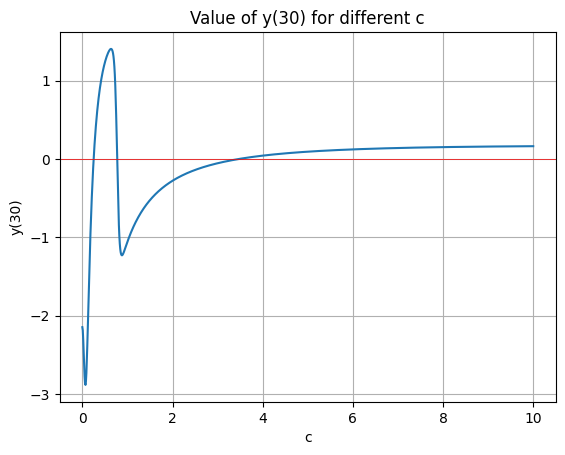

Root found between c = 0.2502502502502503 and c = 0.2602602602602603: c = 0.25132279496293164
Root found between c = 0.7707707707707707 and c = 0.7807807807807807: c = 0.7729931469555493
Root found between c = 3.4734734734734736 and c = 3.4834834834834836: c = 3.479065002502503


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.2
b = 0.8
h = 0.1  # Time step
t_final = 30 # Now the final time is 30 because i want to find y(30)
c_values = np.linspace(0, 10, 1000)  # Explore 100 values of c between 0 and 10

# Bisection method implementation with 1e-6 tolerance
def bisection(c_min, c_max, tol=1e-6):

    while np.abs(c_max - c_min) > tol:
        c_mid = (c_min + c_max) / 2
        fmid = RungeKutta(a, b, c_mid, h, t_final)[2][-1]

        if fmid == 0 or np.abs(fmid) < tol:
            return c_mid
        elif RungeKutta(a, b, c_min, h, t_final)[2][-1] * fmid < 0:
            c_max = c_mid
        else:
            c_min = c_mid
    return (c_min + c_max) / 2

# Itterate over the c values and store the last value of y
y30values = []
for c in c_values:
    _, _, ys = RungeKutta(a, b, c, h, t_final) # No need for the time and x values
    y30values.append(ys[-1])  # Store last value of y

y30values = np.array(y30values)

# Plot results
plt.plot(c_values, y30values)
plt.xlabel("c")
plt.ylabel("y(30)")
plt.title("Value of y(30) for different c")
plt.grid(True)
plt.axhline(0, color='red', lw=0.5)  # Add a horizontal line at y = 0
plt.show()

roots_c = []
# Checking for sign changes
for i in range(len(y30values) - 1):
    if y30values[i] * y30values[i + 1] < 0:  # Sign change detected
        root_c = bisection(c_values[i], c_values[i + 1]) # Find the root using bisection
        roots_c.append(root_c)
        print(f"Root found between c = {c_values[i]} and c = {c_values[i + 1]}: c = {root_c}")


Στην συνέχεια, παρέχονται τα διαγράμματα για να επαληθευτεί ότι με τα c που βρέθηκαν ικανοποιείται η συνθήκη $y(30) = 0$. Και για να παρατηρηθεί η μορφή των συναισθημάτων των δύο ατόμων στις περιπτώσεις αυτές.

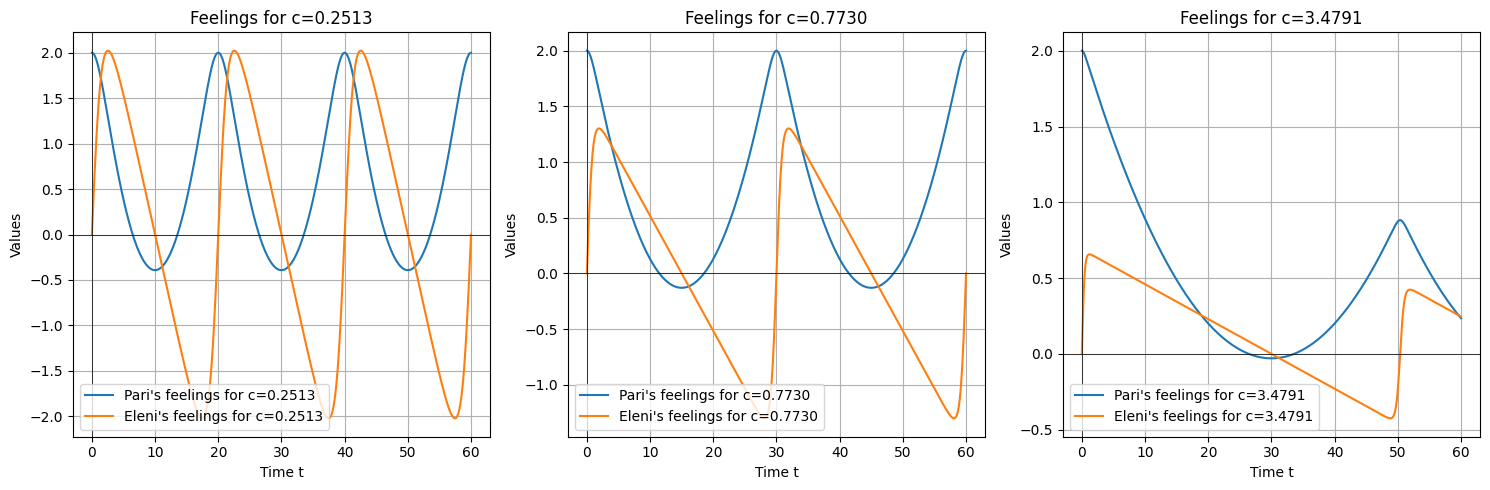

In [33]:
fig, axs = plt.subplots(1, len(roots_c), figsize=(15, 5))
for i, root_c in enumerate(roots_c):
    t, x, y = RungeKutta(a, b, root_c, h, 60)
    axs[i].plot(t, x, label=f'Pari\'s feelings for c={root_c:.4f}')
    axs[i].plot(t, y, label=f'Eleni\'s feelings for c={root_c:.4f}')
    axs[i].set_xlabel('Time t')
    axs[i].set_ylabel('Values')
    axs[i].set_title(f'Feelings for c={root_c:.4f}')
    axs[i].axhline(0, color='black', linewidth=0.5)
    axs[i].axvline(0, color='black', linewidth=0.5)
    axs[i].grid(True)
    axs[i].legend(loc='lower left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Από τα διαγράμματα φαίνεται ότι πράγματι για τις τιμές αυτές των $c$ την χρονική στιγμή 30 η γραφική των συναισθημάτων της Ελένης περνάει από το 0. Παρατηρείται ότι με την αύξηση του $c$ μετριάζονται τα συναισθήματα της Ελένης προς τον Πάρη, γεγονός αναμενόμενο, καθώς η παράμετρος $c$ είναι συντελεστής του $y^2$ στην διαφορική εξίσωση των συναισθημάτων της Ελένης και ο παράγοντας αυτός μοντελοποιεί τις αϋπνίες που μετριάζουν τα συναισθήματα της.